<img src="./pics/DL.png" width=110 align="left" style="margin-right: 10px">

# Introduction to Deep Learning

## 06. Convolutional Networks

---

## [Convolutional Neural Network (CNN)](https://keras.io/layers/convolutional/)

<img src="./pics/external/cnn/cnn.png" width=600 alt="Typical cnn.png"><br>By <a href="//commons.wikimedia.org/w/index.php?title=User:Aphex34&amp;action=edit&amp;redlink=1" class="new" title="User:Aphex34 (page does not exist)">Aphex34</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=45679374">Link</a>

Previously we have built a fully connected dense layer to categorize the MNIST dataset of hand-written numbers. We managed to build a pretty accurate system but we used each pixel as a separate input. Large part of the information is in the spatial structure of the image. Convolutional networks are specialized neural networks. They differ from the fully connected networks by assuming that the input contains spatial information (eg. it's a picture).  
When we look at a picture we are "looking at the big picture", not individual pixels. Our eye is a specialized instrument which is built to recognize shapes, edges, etc. We don't really care how grey is a cat's fur, we know it's a cat because of the overall features, the shapes and contours. Convolutional networks are specialized similarly and build this knowledge into the architecture to execute faster forward propagations and do more accurate training.

A Convolutional Neural Network consists of different building blocks:
- Convolutional layers: feature extraction
- Pooling layers: feature selection
- Dense layers: classification

### Building blocks

#### Convolutional layer


<img src="./pics/cnn/convolutional_layer.png" width=400 align="left">
<br><br>

Instead of vertical line of input neurons, we arrange input neurons into 2d mesh, as they were in the images. We use these input neurons but instead of connecting every input into a neuron in the hidden layer, we only connect them to a small local region. It's more appropriate to look at this from the other way around: from one neuron in the hidden layer, we connect to a region in the input image that we call the hidden neuron's *local receptive field*. 

The hidden neurons have weights and a bias as well just like a regular hidden neuron in a dense network, and their purpose is to learn the related specific region of the input image. In practice, they act as a learnable filter, so we can look at them as a filtering layer which purpose is to detect features in the input. In case of images these features could be edges, or even shapes. 

<div style="align: clear"/>    
<br><br><br>

Their name comes from this view:  
> _In mathematics convolution is a mathematical operation on two functions (f and g) to produce a third function that expresses how the shape of one is modified by the other._ - [source](https://en.wikipedia.org/wiki/Convolution)
    
    
<img src="./pics/external/cnn/convolution.gif" alt="Convolution of box signal with itself2.gif"><br>By <a href="./pics/external/cnn/convolution.gif" title="File:Convolution of box signal with itself.gif">Convolution_of_box_signal_with_itself.gif</a>: Brian Amberg
derivative work: <a href="//commons.wikimedia.org/wiki/User:Tinos" title="User:Tinos">Tinos</a> (<a href="//commons.wikimedia.org/wiki/User_talk:Tinos" title="User talk:Tinos"><span class="signature-talk">talk</span></a>) - <a href="//commons.wikimedia.org/wiki/File:Convolution_of_box_signal_with_itself.gif" title="File:Convolution of box signal with itself.gif">Convolution_of_box_signal_with_itself.gif</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=11003835">Link</a>

This convolution operation is executed by each hidden layer neuron, just like a **rolling window** over the input image. Since each hidden neuron is responsible for a region of input neurons, we can deduct that the output of this layer will be smaller by a pixel in each dimension - in fact that's one parameter of the process. Let's consider convolution in the animation below: a green filtering operation is sliding through the blue input values resulting the red output features.

<div style="display: inline-block;">
    <img src="./pics/external/cnn/sliding_window.gif" width=400 align='left'>
    <img src="./pics/external/cnn/filter.png" width=400 align='left'>
</div>

<div style="align: clear"/>
<br>
Animation by <a href="https://towardsdatascience.com/@ardendertat">Arden Dertat</a>, <a href="https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2">Link</a> 
Image by <a href="https://towardsdatascience.com/@ardendertat">Arden Dertat</a>, <a href="https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2">Link</a>
</div>

It is important to note that **the weights** in a layer **are shared** among the neurons on a given layer. We can express the output of a hidden neuron with a 5 x 5 size receptive field as:
$$\sigma\left(b + \sum_{l=0}^4 \sum_{m=0}^4  w_{l,m} a_{j+l, k+m} \right)$$
where $\sigma$ is the activation function, $w_{l,m}$ is the shared weight, and finally $a_{x, y}$ is the input neuron at the $x, y$. The generated output from the input using a convolutional hidden layer is called *feature map* and the above equition is defining a *kernel* or *filter*.  
Multiple convolutional layer can be used on the same input, each responsible for a different feature mapping. Weights and biases only shared inside a layer, but not between these feature maps.

The three main parameter to watch out when defining a convolutional layer is:

- __depth__: The number of filters we'd like to use
- __stride__: The size of the step the convolution filter moves each time
- __padding__: the size of the zero-padding around the input

#### Pooling layer

<img src="./pics/external/cnn/pooling.png" width=400><br>By <a href="https://cs.stanford.edu/people/karpathy/">Andrej Karpathy</a>, <a href="http://cs231n.github.io/convolutional-networks/">Link</a>

Pooling is much more straightforward: It reduces the dimensionality of the input by downsampling it. It usually follows a convolutional layer, and is defined by a *window size* and an *aggregation function* to create an approximate output of the input. We can look at them as a way to drop the location information, since the found  Using a poolig layer prevents overfitting, reduces the number of weights in the consecutive layers, shortens training time, and also keeps the important informations. The most common aggregation function is **max**, in this case we call the layer a *max-pooling* layer. Other common choice is the *L2-pooling* which takes the square root of the sum of the squeares inside the pool.

The two important parameters are:
- **pool size**: the size of the window to aggregate
- **stride**: the stepsize

#### Other layers

- **Fully-connected layer**: Standard Dense fully connected layer with proper a cost function.
- **Flatten**: Transforming layer. Multi-dimensional neurons are flattened into a single layer of neurons

## In Practice

### MNIST

Let's improve our previous naive solution by building a CNN classifier for the hand digits dataset.  
The previously used dataset was a simplyfied version, the image resolutions were *8 x 8*, and the dataset contained only ~2000 items. This dataset however contains 70,000 images (60k training and 10k test image) of *28 x 28* resolution.

Let's look into the data first!

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


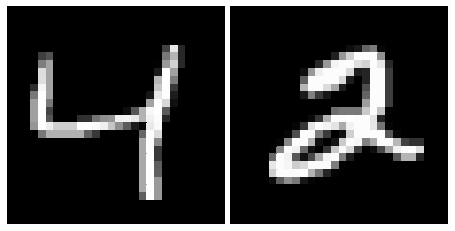

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
fig.subplots_adjust(wspace=0, hspace=0)
sns.heatmap(X_train[2], cmap='gray', cbar=False, square=True, 
            xticklabels=False, yticklabels=False, annot=False, 
            ax=ax1)
sns.heatmap(X_train[5], cmap='gray', cbar=False, square=True, 
            xticklabels=False, yticklabels=False, annot=False, 
            ax=ax2)

2D convolutional layers expects images with multiple channels, eg. RGB or YMCK color channels, or multiple feature maps in deeper levels of the network. We examine the shape of our dataset first to reassure the correct dimensions.

In [6]:
X_train.shape, X_test.shape, y_train.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,))

We can see that the dimensions of the data is *records x height x width*, which is missing one dimension: the channel information.  
Let's reshape it to the desired shape!

In [5]:
X_train = X_train.reshape(*X_train.shape, 1)
X_test = X_test.reshape(*X_test.shape, 1)

Now that the data is in the desired format, let's design our network.  
For the first iteration, our network will be the following:
- convolution layer:
    - 3 x 3 receptive field
    - 1 steps at a time
    - 32 filters
    - `relu` activation 
- maxpooling layer:
    - 2 x 2 pool layer
    - non-ovelapping slide
- flattening
- dense layer with `softmax` activation

**Questions:** 
- What is the shape of the inputs?
- How many output neuron do we need?
- Which loss function should we use?

In [7]:
input_shape = (28, 28, 1)  # what is the input shape?
output_size = 10  # how many output neurons do we need?
loss_function = 'sparse_categorical_crossentropy'  # which loss function should we use?

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(output_size))
model.add(Activation('softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

**Questions:**
- How many parameters are in the convolution layer? Why?
- What will be the output shape of the pooling layer?
- How many parameters are in the dense network?

Check the answers by uncommenting the code in the cell below and run it.

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
__________________________________________________

#### Keras callbacks

Training deep networks could easily take multiple hours, days, in some extreme cases, weeks. During that period many thing could go wrong, many interesting thing can happen with the network.  
After starting the training process the only interaction we have with the process is to observe the results or stop the process. However there is a backdoor available: the callbacks.  
Callbacks are functions which is called at the end of each epoch. You can create your [own](https://www.tensorflow.org/guide/keras/custom_callback) or use the [built-in solutions](https://keras.io/callbacks/).

##### Early stopping
In this case we don't want perfect results but we want them quick. We are going to use the `EarlyStopping` callback which simply does what its name suggests: stops early if the training process does not improve. It has a `patience` parameter which allows *n* epochs without improvement before stopping the process.  
To help it's work, we are going to provide **validation data** to the fitting process. There are two ways to do this: manually create the validation set or by setting a split ratio. We're going to do the latter.

In [10]:
model.fit(X_train, y_train, 
          batch_size=16,
          epochs=100,
          validation_split=0.1,
          callbacks=[EarlyStopping(patience=3)])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 14s 255us/step - loss: 0.6259 - accuracy: 0.9397 - val_loss: 0.1104 - val_accuracy: 0.9693
Epoch 2/100
54000/54000 [==============================] - 14s 252us/step - loss: 0.1013 - accuracy: 0.9698 - val_loss: 0.1293 - val_accuracy: 0.9698
Epoch 3/100
54000/54000 [==============================] - 13s 240us/step - loss: 0.0808 - accuracy: 0.9757 - val_loss: 0.1126 - val_accuracy: 0.9710
Epoch 4/100
54000/54000 [==============================] - 13s 238us/step - loss: 0.0717 - accuracy: 0.9792 - val_loss: 0.1184 - val_accuracy: 0.9752


In [11]:
loss, acc = model.evaluate(X_test, y_test)
print(f'test loss: {loss}, test acc: {acc}')

10000/10000 [==============================] - 1s 72us/step
test loss: 0.11674221257695971, test acc: 0.973800003528595


## Exercise

### MNIST dataset and LeNet-5

Build the famous LeNet-5 convolutional network based on the published [paper](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf).  
Note that in the paper, the images in the MNIST dataset were in *32 x 32* resolution - let's ignore this difference, and tweak the model accordingly.

In [13]:
# 1. Build the model
lenet5 = Sequential()

lenet5.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), input_shape=input_shape))
lenet5.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
lenet5.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1)))
lenet5.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
lenet5.add(Flatten())
lenet5.add(Dense(84, activation='sigmoid'))
lenet5.add(Dense(10, activation='softmax'))

# 2. Compile the model
lenet5.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

In [14]:
lenet5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)                21588     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [15]:
# 3. Fit the model
lenet5.fit(X_train, y_train, batch_size=16, epochs=100, validation_split=0.1, callbacks=[EarlyStopping(patience=3)])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 18s 335us/step - loss: 0.8572 - accuracy: 0.7244 - val_loss: 0.3350 - val_accuracy: 0.9025
Epoch 2/100
54000/54000 [==============================] - 18s 330us/step - loss: 0.3771 - accuracy: 0.8845 - val_loss: 0.3220 - val_accuracy: 0.9020
Epoch 3/100
54000/54000 [==============================] - 17s 320us/step - loss: 0.3316 - accuracy: 0.8971 - val_loss: 0.2255 - val_accuracy: 0.9355
Epoch 4/100
54000/54000 [==============================] - 17s 316us/step - loss: 0.3049 - accuracy: 0.9059 - val_loss: 0.2430 - val_accuracy: 0.9263
Epoch 5/100
54000/54000 [==============================] - 17s 316us/step - loss: 0.3006 - accuracy: 0.9063 - val_loss: 0.2699 - val_accuracy: 0.9125
Epoch 6/100
54000/54000 [==============================] - 17s 318us/step - loss: 0.3040 - accuracy: 0.9062 - val_loss: 0.2265 - val_accuracy: 0.9320


In [16]:
loss, acc = lenet5.evaluate(X_test, y_test)
print(f'test loss: {loss}, test acc: {acc}')

10000/10000 [==============================] - 1s 88us/step
test loss: 0.26241378702521323, test acc: 0.9210000038146973


### Good job!

In the next chapter we'll talk about how can we create vectorial representation of complex concepts using a neural network to embed the data in [DL 07 Embeddings](./DL_07_Embeddings.ipynb).